# Project 4

## Manbir Kaberwal
## EAE 127 


# Intoduction

This project introduces vortex flows into the potential flow toolkit, expanding beyond sources and sinks. The Project 4 Supplement offers equations and code for vortex implementations. The goal is to visualize various superposition plots, including standalone vortex, vortex combined with a sink, a 12-vortex sheet, and an infinite vortex sheet. The second part involves modifying an incomplete vortex panel method code to simulate airflow over different airfoils and angles of attack, comparing results with viscous XFOIL simulations. The analysis explores why a vortex panel method can calculate lift for cambered airfoils compared to a source panel method, emphasizing computational differences. 

In [71]:
### Imports ###
import numpy as np
import matplotlib.pyplot as plt
import pyxfoil
import math 
from scipy import integrate
import mses
from mses import MsesSplit


# Problem 1 - Vortex Potential Flow


## Equations


### $$V_{r} = \frac{\Gamma}{2 \pi r}$$


- $\Gamma$ = 5


### $$u(x, y) = \frac{\Gamma}{2 \pi} \frac{y}{x^2 + y^2}$$

### $$v(x, y) = -\frac{\Gamma}{2 \pi} \frac{x}{x^2 + y^2}$$

- $\Lambda$ = -1

### Finite Vortex Sheet


### $$u(x, y) = \frac{\Gamma}{2 \pi} \sum_{i = 1}^{N} \frac{Y - y_{i}}{(X - x_{i})^2 + (Y - y_{i}))^2}$$

### $$v(x, y) = -\frac{\Gamma}{2 \pi} \sum_{i = 1}^{N} \frac{X - x_{i}}{(X - x_{i})^2 + (Y - y_{i}))^2}$$

### Infinite Vortex Sheet


### $$u(x, y) = \frac{\Gamma}{2 a} \frac{sinh \frac{2 \pi y}{a}}{cosh \frac{2 \pi y}{a} - cos\frac{2 \pi x}{a}}$$

### $$v(x, y) = -\frac{\Gamma}{2 a} \frac{sin \frac{2 \pi x}{a}}{cosh \frac{2 \pi y}{a} - cos\frac{2 \pi x}{a}}$$

## Code


For this code we define functions for potential flow around various elements, including a vortex, a sink, and an infinite vortex sheet. The code then combines these elements to create four different potential flow scenarios: a vortex, a vortex combined with a sink, a vortex sheet, and an infinite vortex sheet. It uses the streamplot function from Matplotlib to visualize the streamlines of the potential flow fields for each scenario in a 2x2 subplot layout. The parameters, such as the strengths and positions of vortices and sinks, can be adjusted to observe their effects on the flow patterns. The code provides a clear visualization of basic potential flow phenomena, making it a useful educational tool for understanding aerodynamics concepts.


C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\27836739.py:12: RuntimeWarning: invalid value encountered in divide
  u = +strength/(2*np.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\27836739.py:13: RuntimeWarning: invalid value encountered in divide
  v = -strength/(2*np.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\27836739.py:17: RuntimeWarning: invalid value encountered in divide
  u = -strength/(2*np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\27836739.py:18: RuntimeWarning: invalid value encountered in divide
  v = -strength/(2*np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\27836739.py:24: RuntimeWarning: invalid value encountered in divide
  u = (Gamma / 2 * a) * np.sinh((2*math.pi*Y)/(a)) / ((np.cosh((2*math.pi*Y)/(a))) - (np.cos((2*math.pi*X)/(a))))
C:\Users\Manbir\AppData

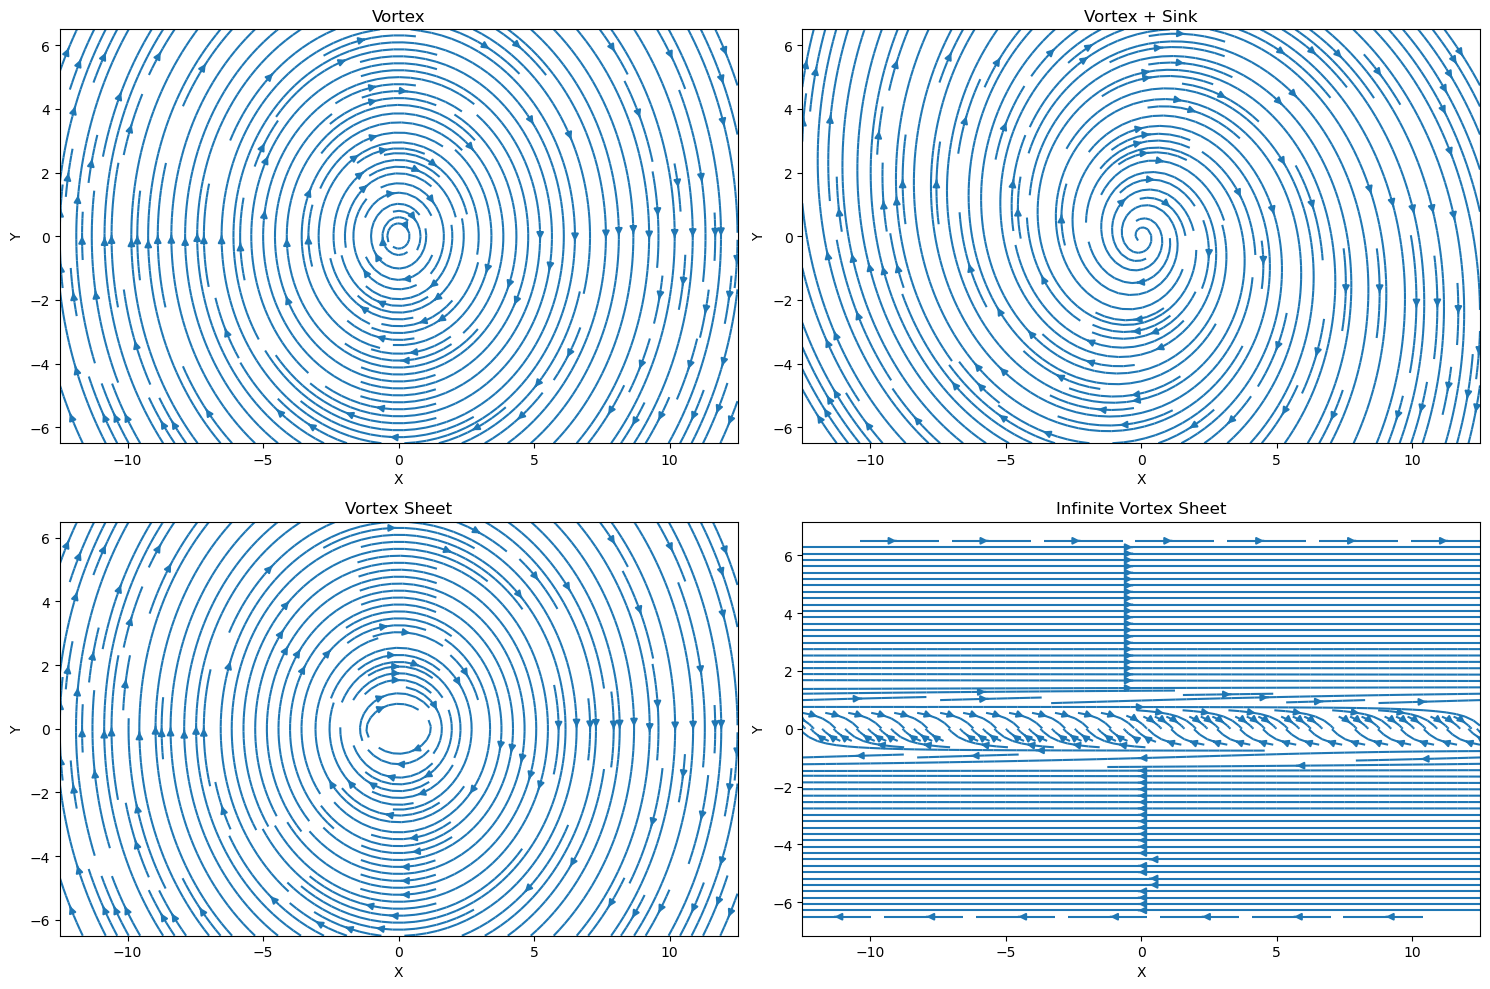

In [105]:
# Set up grid
N = 161                               # Number of points in each direction
x_start, x_end = -12.5, 12.5            # x-direction boundaries
y_start, y_end = -6.5, 6.5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid


# Define functions for potential flow
def vortex(strength, xv, yv, X, Y):
    u = +strength/(2*np.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength/(2*np.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    return u, v

def sink(strength, xs, ys, X, Y):
    u = -strength/(2*np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = -strength/(2*np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    return u, v

def infinite_vortex_vel(Gamma, a, X, Y):
   
    # Here, input the equation for u_vortex from the equations above
    u = (Gamma / 2 * a) * np.sinh((2*math.pi*Y)/(a)) / ((np.cosh((2*math.pi*Y)/(a))) - (np.cos((2*math.pi*X)/(a))))

    # Here, input the equation for v_vortex from the equations above
    v = (-Gamma / 2 * a) * np.sin((2*math.pi*Y)/(a)) / ((np.cosh((2*math.pi*Y)/(a))) - (np.cos((2*math.pi*X)/(a))))
    
    return u, v
# Vortex
gamma = 5.0
u_vortex, v_vortex = vortex(gamma, 0, 0, X, Y)

# Vortex + Sink
lambda_ = -1
u_vortex_sink, v_vortex_sink = vortex(gamma, 0, 0, X, Y)
u_vortex_sink += sink(lambda_, 0, 0, X, Y)[0]
v_vortex_sink += sink(lambda_, 0, 0, X, Y)[1]

# Vortex Sheet
n_vortices = 12
xv_sheet = np.linspace(-1, 1, n_vortices)
gamma_sheet = np.full(n_vortices, gamma)
u_vortex_sheet, v_vortex_sheet = 0, 0
for i in range(n_vortices):
    u_i, v_i = vortex(gamma_sheet[i], xv_sheet[i], 0, X, Y)
    u_vortex_sheet += u_i
    v_vortex_sheet += v_i

# Infinite Vortex Sheet
u_inf_vortex_sheet, v_inf_vortex_sheet = infinite_vortex_vel(5.0, 1.5, X, Y)

# Plotting
plt.figure(figsize=(15, 10))

# Vortex
plt.subplot(2, 2, 1)
plt.streamplot(X, Y, u_vortex, v_vortex, density = 2)
plt.title('Vortex')
plt.xlabel('X')
plt.ylabel('Y')

# Vortex + Sink
plt.subplot(2, 2, 2)
plt.streamplot(X, Y, u_vortex_sink, v_vortex_sink, density = 2)
plt.title('Vortex + Sink')
plt.xlabel('X')
plt.ylabel('Y')

# Vortex Sheet
plt.subplot(2, 2, 3)
plt.streamplot(X, Y, u_vortex_sheet, v_vortex_sheet, density = 2)
plt.title('Vortex Sheet')
plt.xlabel('X')
plt.ylabel('Y')

# Infinite Vortex Sheet
plt.subplot(2, 2, 4)
plt.streamplot(X, Y, u_inf_vortex_sheet, v_inf_vortex_sheet, density = 2)
plt.title('Infinite Vortex Sheet')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()


# Problem 2 - Vortex Panel Method

## Approach
The approach to creating a vortex panel method is very similar to how we created the panel method in our previous project. What we must do is adapt our objects to be able to support and define the effects of using vortex's.
## Equations

Normal: 
### $$ u_{n_{i}} = U_{\infty}cos(\beta_{i}) + \frac{\sigma_{i}}{2} + \sum_{j=1 , j \neq i }^{N_{p}} \frac{\sigma_{j}}{2\pi} \int  \frac{(x_{c_{i}} - x_{j}(s_{j}))cos\beta_{i}  + (y_{c_{i}} - y_{j}(s_{j}))sin\beta_{i} } {(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} \,ds_{j}  $$

Tangential:
### $$ u_{t_{i}} = -U_{\infty}sin(\beta_{i}) + \sum_{j=1 , j \neq i }^{N_{p}} \frac{\sigma_{j}}{2\pi} \int  \frac{(x_{c_{i}} - x_{j}(s_{j}))(-sin\beta_{i})  + (y_{c_{i}} - y_{j}(s_{j}))cos\beta_{i} } {(x_{c_{i}} - x_{j}(s))^2 + (y_{c_{i}} - y_{j}(s)) ^2} \,ds_{j}  $$


## Code

This code defines a Python class named `Panel` to represent a panel in a potential flow analysis of airfoils. The class has attributes to store the coordinates of the panel endpoints, the center point, length, orientation angle (beta), and location (upper or lower surface). The class also initializes parameters for circulation strength (sigma), tangential velocity (vt), and pressure coefficient (cp). Additionally, the code includes functions to define a set of panels based on given airfoil coordinates, calculate normal and tangential influence coefficients, and solve for the panel strengths using a linear system of equations. The code is part of a potential flow solver for analyzing aerodynamic characteristics of airfoils, including lift, drag, and pressure distributions. The computation involves vortex and source panels, and the results are used to calculate circulation strengths and tangential velocities, providing insights into the aerodynamic behavior of the airfoil.

In [3]:
class Panel:
    """
    Here, we are creating a panel object and all its necessary information. 
    """

    def __init__(self, xa, ya, xb, yb):
       
        self.xa, self.ya = xa, ya           # Defines the first end point
        self.xb, self.yb = xb, yb           # Defines the second end point

        # Defining center point and panel parameters
        # You will need to define these yourself:
        self.xc, self.yc = (xa + xb) / 2, (ya + yb) / 2         # Control point or center point (How do you find the center of two points?)
        self.length = math.sqrt((xb - xa)**2 + (yb - ya)**2)    # Length of the panel (How do you find the distance between two points)

        # For the orientation of the panel (angle between x axis and the unit vector normal to the panel)
        if xb - xa <= 0:
            self.beta = math.acos((yb - ya) / self.length)
        elif xb - xa > 0:
            self.beta = math.pi + math.acos(-(yb - ya) / self.length)

        # Location of the panel (we will use this later when we expand our analys to airfoils)
        if self.beta <= math.pi:
            self.loc = 'upper'
        else:
            self.loc = 'lower'

        # We also need 3 more parameters, sigma, vt for tangential velocity, and cp for pressure distribution. 
        # Create these and set the equal to zero for now

        self.sigma = 0.0 
        self.vt = 0.0
        self.cp = 0.0



def define_panels(x, y, N=161):
    
    R = (x.max() - x.min()) / 2  # radius of the circle
    x_center = (x.max() + x.min()) / 2  # x-coord of the center
    # define x-coord of the circle points
    x_circle = x_center + R * np.cos(np.linspace(0.0, 2 * math.pi, N + 1))
    
    x_ends = np.copy(x_circle)  # projection of the x-coord on the surface
    y_ends = np.empty_like(x_ends)  # initialization of the y-coord Numpy array

    x, y = np.append(x, x[0]), np.append(y, y[0])  # extend arrays using numpy.append
    
    # computes the y-coordinate of end-points
    I = 0
    for i in range(N):
        while I < len(x) - 1:
            if (x[I] <= x_ends[i] <= x[I + 1]) or (x[I + 1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        # Interpoaltion Process (Finding Y Points)   
        a = (y[I + 1] - y[I]) / (x[I + 1] - x[I])
        b = y[I + 1] - a * x[I + 1]
        y_ends[i] = a * x_ends[i] + b
        

    y_ends[N] = y_ends[0]
    print(y_ends)
    
    panels = np.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i + 1], y_ends[i + 1])
    
    return panels

In [4]:
def integral_normal(p_i, p_j):
    """
    Evaluates the contribution of a panel at the center-point of another,
    in the normal direction.

    Parameters:
    -----------
    p_i: Panel object
        Panel on which the contribution is calculated.
    p_j: Panel object
        Panel from which the contribution is calculated. 
    """

    def integrand(s):
        return (((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s)) * math.cos(p_i.beta) +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s)) * math.sin(p_i.beta)) /
                ((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]

In [5]:
def source_integral_normal(p_i, p_j):
    """
    Evaluates the contribution of a source-panel at the center-point of another,
    in the normal direction.

    Parameters:
    -----------
    p_i: Panel object
        Panel on which the contribution is calculated.
    p_j: Panel object
        Panel from which the contribution is calculated. 
    """

    ## Fill in the equation below for the function integrand
    def integrand(s):
        return (((p_i.xc - (p_j.xa - np.sin(p_j.beta) * s)) * np.cos(p_i.beta) +
                 (p_i.yc - (p_j.ya + np.cos(p_j.beta) * s)) * np.sin(p_i.beta)) /
                ((p_i.xc - (p_j.xa - np.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + np.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]

In [6]:
def vortex_integral_normal(p_i, p_j):
    """
    Evaluates the contribution of a source-panel at the center-point of another,
    in the normal direction.

    Parameters:
    -----------
    p_i: Panel object
        Panel on which the contribution is calculated.
    p_j: Panel object
        Panel from which the contribution is calculated. 
    """

    # STUDENTS COMPLETE THE CODE BELOW:
    def integrand(s):
        return (((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s)) * math.sin(p_i.beta) -
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s)) * math.cos(p_i.beta)) /
                ((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]

In [8]:
def analyze_panels(panels, uinf, alpha):
    """"
    Here, we write some code to analyze our panels after they have been created. 

    Creates a source influence matrix [A]


    Input: an array of panels created using the Panel function (panels) and a freestream velocity (u_inf). 

    """

    N = len(panels)


    A_s = np.empty((N, N), dtype = float)  # Source Contribution Normals
    A_v = np.empty((N, N), dtype = float)  # Vortex Contribution Normals

    np.fill_diagonal(A_s, 0.5)
        # Whenever we have i = j, we have sigma(i)/2 or sigma(i)*0.5. Thus, on our diagonal for matrix A we should have 0.5 
        # The diagonal of a matrix means i = j i.e (1,1), (2,2), etc etc.
        # Remember that this represents how much a source panel conributes to its OWN normal velocity

    np.fill_diagonal(A_v, 0.0)
        # Here, we have the same thing, but for vortex contributions on normal velocity.

    # Create the source influence matrix [A_s] of the linear system
    # This represents how much a source panel contributes to OTHER panels normal velocity.
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_s[i,j] = (0.5/math.pi) * source_integral_normal(p_i, p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    # Create the vortex influence matrix [A_v]
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A_v[i,j] = -(0.5/math.pi) * vortex_integral_normal(p_i, p_j)
                # Here, we create a matrix called A_s to hold the source contributions
                # Make sure that you change this to use our new functions rather than our old ones. 

    A_s_norm = A_s  # A normal
    A_v_norm = A_v  # B vortex

    # Kutta Condition:
    # First, lets create an array to hold all of our values.
    # This array should be of length N + 1 (the number of panels + 1)
    Kutta = np.empty(A_s.shape[0] + 1, dtype=float)
    
    # Next, we would like all the elements of our Kutta array (except the last)
    # to be equal to the first and last values of our vortex contribution matrix.
    Kutta[:-1] = A_v[0, :] + A_v[-1, :]

    # Finally, we make the last element of our Kutta array equal to the sum of 
    # all the last elements of our source contribution matrix. 
    Kutta[-1] = - np.sum(A_s[0, :] + A_s[-1, :])


    A = np.empty((N+1, N+1), dtype = float)

    # Enter the source contribution matrix
    # This takes up all but the last column and all but the last row
    # The vortex strength (gamma) and the kutta condition will take this place 
    A[:-1, :-1] = A_s_norm

    # Enter the vortex contribution array
    # Fills in the last column
    A[:-1, -1] = np.sum(A_v_norm, axis = 1)

    # Enter the Kutta array
    # Fills in the last row
    A[-1, :] = Kutta

    # Freestream Velocity and Matrix b
    # Lets start by creating an empty array b
    alpha = np.radians(alpha)
    b = np.empty(N + 1, dtype = float)

    for i, panel in enumerate(panels):
        b[i] = - uinf * np.cos(alpha - panel.beta)

    # Freestream contribution on the Kutta condition
    b[-1] = - uinf * (np.sin(alpha - panels[0].beta) + np.sin(alpha - panels[-1].beta))

    Strengths = np.linalg.solve(A,b)

    for i, panel in enumerate(panels):
        panel.sigma = Strengths[i]

    gamma = Strengths[-1]
    

    # Computing Tangential Velocity
    A_t = np.empty((panels.size, panels.size+1), dtype = float)

    A_t[:, :-1] = A_v
    A_t[:, -1] = -np.sum(A_s, axis = 1)
    
    b_t = uinf * np.sin([alpha - panel.beta for panel in panels])

    vortex_strengths = np.append([panel.sigma for panel in panels], gamma)

    tan_vel = np.dot(A_t, vortex_strengths) + b_t

    for i, panel in enumerate(panels):
        panel.vt = tan_vel[i]


    # Finally, we need to compute the pressure coefficient. 
    for panel in panels:
        panel.cp = 1.0 - (panel.vt / uinf)**2

    accuracy = sum([panel.sigma * panel.length for panel in panels])
    print('sum of singularity strengths: {:0.6f}'.format(accuracy))


Below is the cell of code I used to retreive all the required data for the 3 airfoils. There was some issue with getting data for Selig 1223, but once I got the .dat file from airfoiltools.com xfoil was able to run and calculate the appropriate polar and surface pressure data at $Re = 1.8940*10^{15}$

In [92]:
NACA = True
alf = 8
foil = '23012'
Re = 1.8940e+5
pyxfoil.GetPolar(foil, NACA, alf, Re)

filename14 = 'Data/naca0014/naca0014.dat'
filename12 = 'Data/naca23012/naca23012.dat'
x14, z14 = np.loadtxt(filename14, dtype=float, unpack=True, skiprows = 1)
x12, z12 = np.loadtxt(filename12, dtype =float, unpack=True, skiprows = 1)


# NACA 0014 Panel Geomatry and Analysis Plots

[ 0.00147     0.00163089  0.00211292  0.00291016  0.00401458  0.00541226
  0.00709192  0.00903514  0.01122153  0.01362784  0.01623297  0.01901117
  0.02193897  0.02499398  0.02815297  0.03138506  0.03466253  0.03796818
  0.0412626   0.04452771  0.047733    0.05084057  0.05383332  0.05667587
  0.05932164  0.06175257  0.06393691  0.06583956  0.06740917  0.06863573
  0.06949243  0.06994783  0.06995757  0.06953895  0.06866866  0.06730735
  0.06551548  0.06321379  0.0604921   0.05730167  0.05369926  0.0497222
  0.04532682  0.04060238  0.03554614  0.03020367  0.02459395  0.01875068
  0.01269198  0.00643565  0.000994   -0.00643565 -0.01269198 -0.01875068
 -0.02459395 -0.03020443 -0.03554614 -0.04060238 -0.04532696 -0.0497222
 -0.05369926 -0.05730162 -0.06049196 -0.06321379 -0.06551548 -0.06730735
 -0.06866866 -0.06953895 -0.06995757 -0.06994783 -0.06949245 -0.06863573
 -0.06740919 -0.06583956 -0.06393691 -0.0617526  -0.0593217  -0.05667587
 -0.05383332 -0.05084062 -0.047733   -0.0445278  -0.0

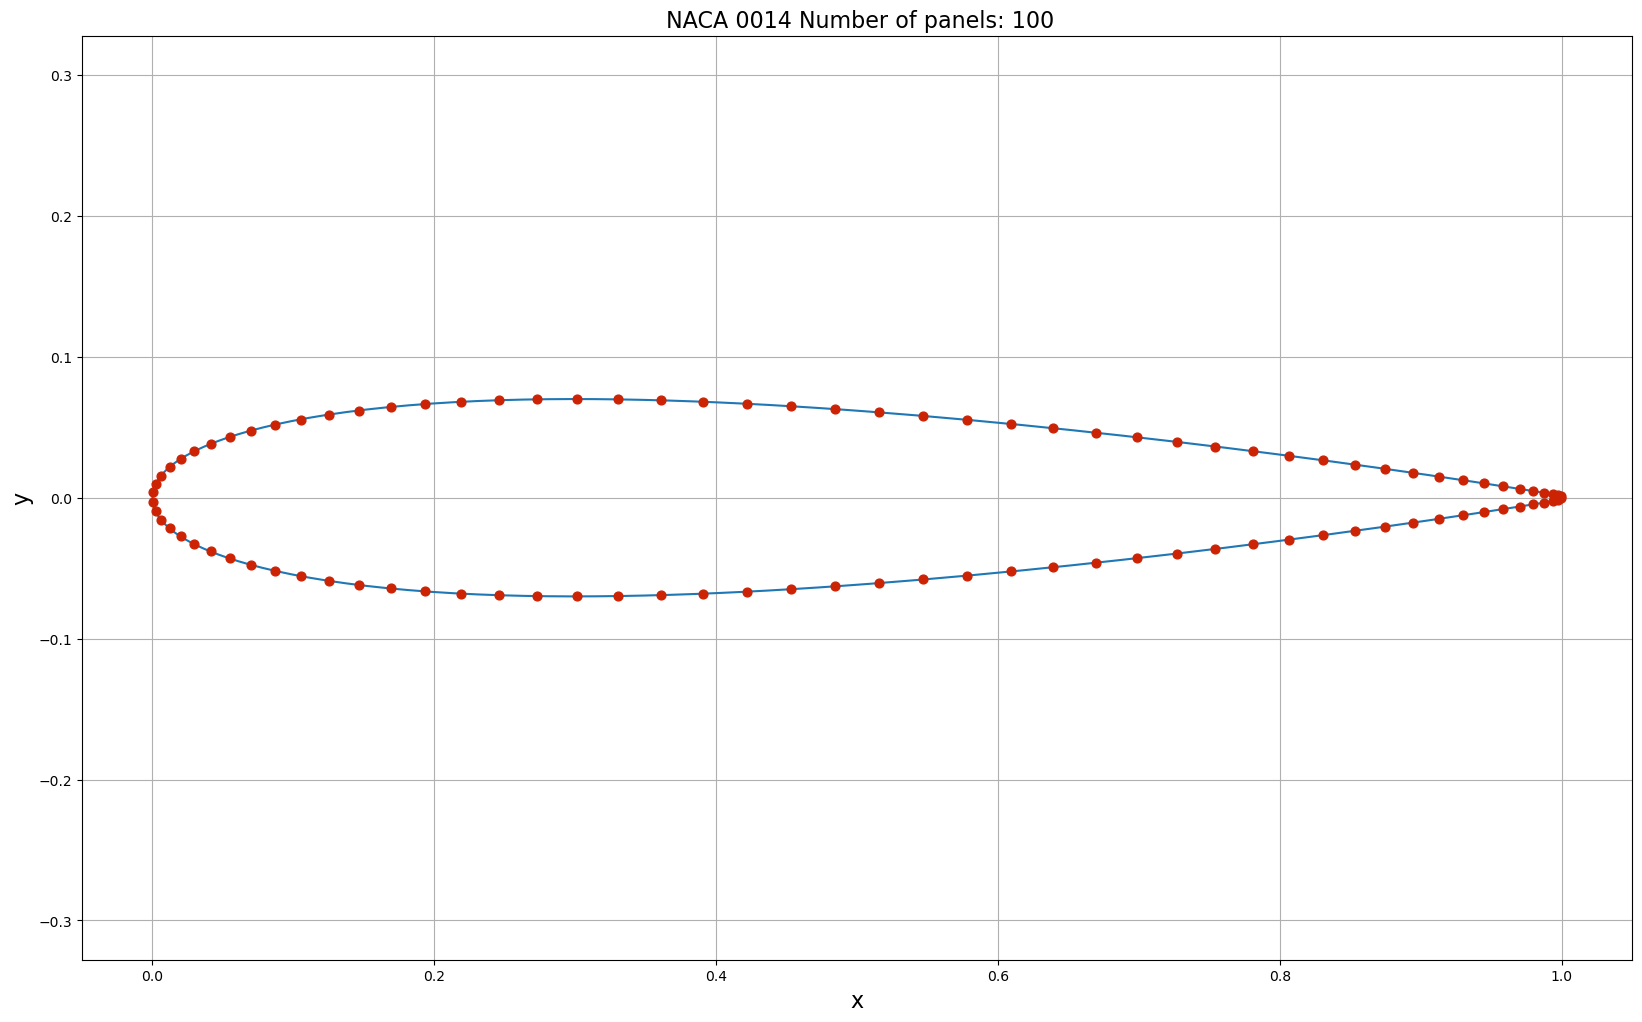

In [47]:
panels14 = define_panels(x14, z14, 100)
# Here, we define some panels using the x and y points and the number of panels we would like to use. 

# Lets plot these panels on the above plot. 
plt.figure(figsize = (20,12))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.xlim(x_start, x_end)
#plt.ylim(y_start, y_end)

plt.plot(x14, z14)
plt.scatter([p.xc for p in panels14], [p.yc for p in panels14],
               label='source-panel method',
               color='#CD2305', s=40, zorder=2)
plt.title(' NACA 0014 Number of panels: {}'.format(panels14.size), fontsize=16);
plt.axis('equal')
plt.show()



## Analysis of NACA 0014 at $\alpha = 8$

Comparing the xfoil results to our vortex panel method we can see very simmilar results the methods we have created are good at approximating Surface pressure distribution for symetric airfoils. We will se later when performing the comparison of data for camber that the results are not comparative to the symentrric NACA 0014 airfoil. (Xfoil apprximation shown in orange and blue while the vortex panel method is show in red and blue with dots)

In [78]:
analyze_panels(panels14, 2.2, 8.0)

loadfile =  'Data/naca0014/naca0014_surfCP_Re1.89e+05a8.0.dat'
x_3, y_3, Cp3 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_0012, x_lo_0012   = MsesSplit(x_3, x_3)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_0012, Cp_lo_0012 = MsesSplit(x_3, Cp3)

sum of singularity strengths: 0.004645


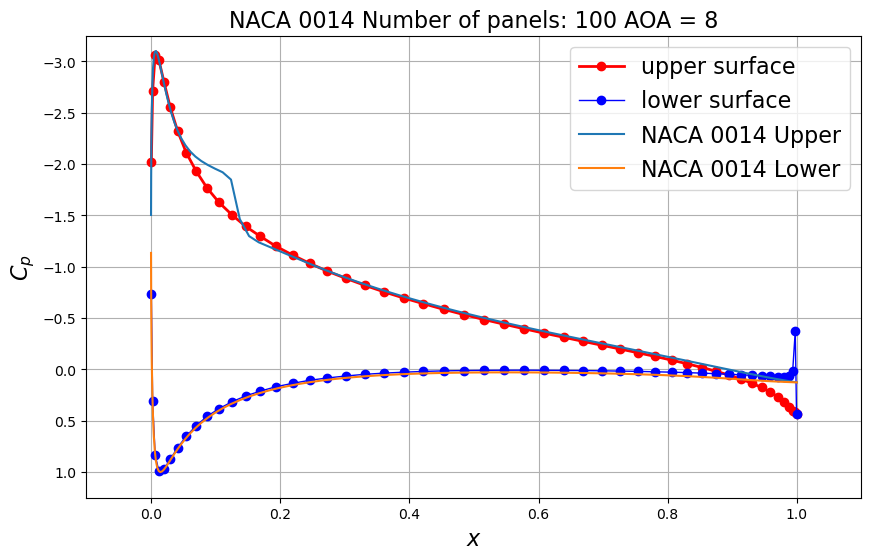

In [96]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.plot([panel.xc for panel in panels14 if panel.loc == 'upper'],
            [panel.cp for panel in panels14 if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.plot([panel.xc for panel in panels14 if panel.loc == 'lower'],
            [panel.cp for panel in panels14 if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
plt.plot(x_up_0012, Cp_up_0012, label="NACA 0014 Upper")
plt.plot(x_lo_0012, Cp_lo_0012, label="NACA 0014 Lower")
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.1)
plt.ylim(1.25, -3.25)
plt.title('NACA 0014 Number of panels: {} AOA = 8'.format(panels14.size), fontsize=16);

## Analysis of NACA 0014 at $\alpha = 0$

In [97]:
analyze_panels(panels14, 2.2, 0.0)

loadfile =  'Data/naca0014/naca0014_surfCP_Re1.89e+05a0.0.dat'
x_3, y_3, Cp3 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_0012, x_lo_0012   = MsesSplit(x_3, x_3)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_0012, Cp_lo_0012 = MsesSplit(x_3, Cp3)

sum of singularity strengths: 0.004506


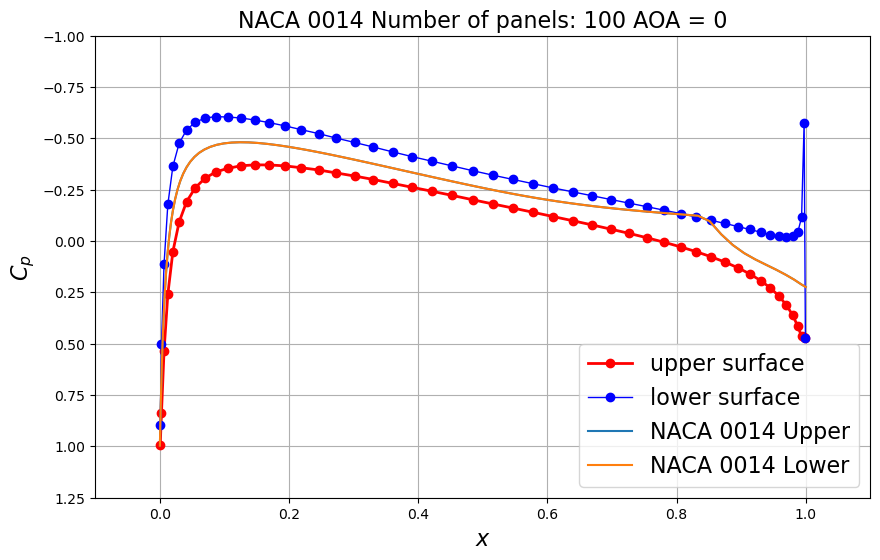

In [99]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.plot([panel.xc for panel in panels14 if panel.loc == 'upper'],
            [panel.cp for panel in panels14 if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.plot([panel.xc for panel in panels14 if panel.loc == 'lower'],
            [panel.cp for panel in panels14 if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
plt.plot(x_up_0012, Cp_up_0012, label="NACA 0014 Upper")
plt.plot(x_lo_0012, Cp_lo_0012, label="NACA 0014 Lower")
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.1)
plt.ylim(1.25, -1)
plt.title('NACA 0014 Number of panels: {} AOA = 0'.format(panels14.size), fontsize=16);

# NACA 23012 Panel Geomatry and Analysis Plots

[ 0.00126     0.00132162  0.00150638  0.00181401  0.00224402  0.00279108
  0.00345791  0.00424022  0.00513206  0.00613653  0.00724116  0.0084521
  0.00975533  0.01115364  0.0126399   0.01420495  0.01585187  0.01756978
  0.01935054  0.02119506  0.02309676  0.02504895  0.02704398  0.02907563
  0.03114065  0.03323368  0.03534703  0.0374754   0.03961293  0.04175322
  0.0438904   0.04601831  0.04812604  0.05021025  0.05226352  0.05428054
  0.05625408  0.05817793  0.06004391  0.06183824  0.06355767  0.06519662
  0.06674912  0.06820782  0.06956361  0.0707995   0.07191906  0.07291563
  0.07378388  0.07451691  0.07511     0.07555118  0.07583447  0.07596303
  0.0759335   0.0757426   0.07538888  0.07486675  0.074151    0.0731961
  0.07196235  0.07042077  0.06855292  0.06635212  0.06382007  0.06096782
  0.05781534  0.0543885   0.05072144  0.04685234  0.04280859  0.03860447
  0.03433476  0.03005944  0.02572361  0.02147187  0.01727156  0.01316153
  0.00918425  0.00534871  0.0015858   0.0015858  -0.0

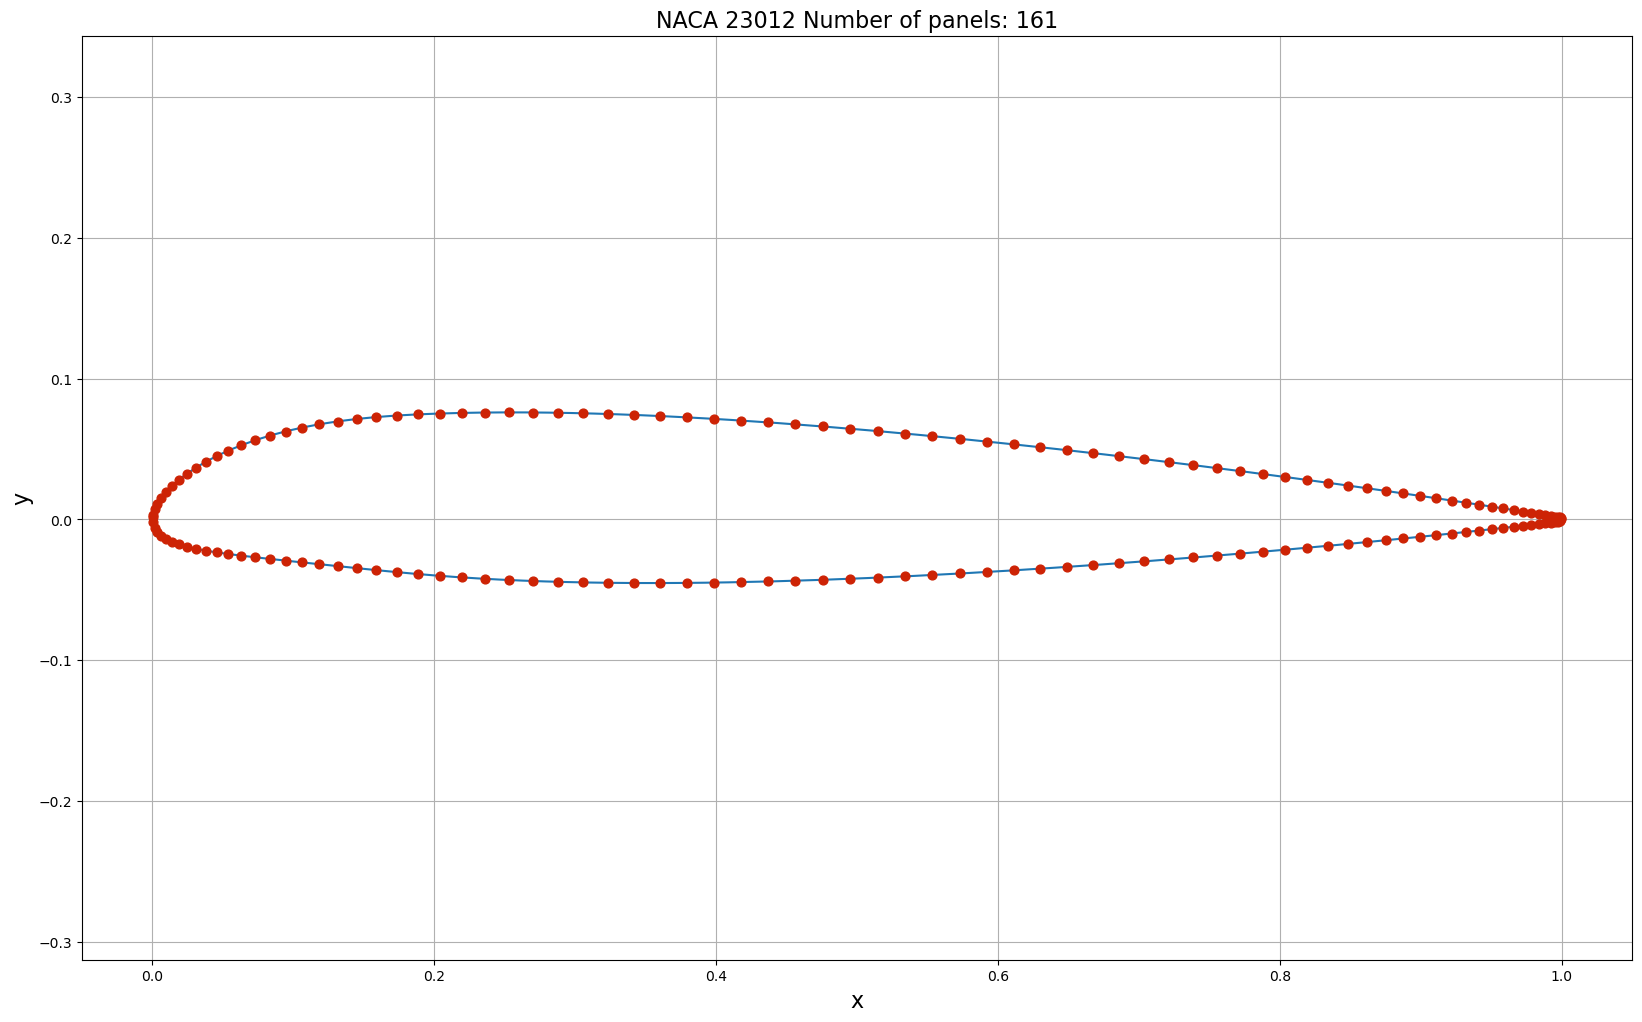

In [51]:
panels12 = define_panels(x12, z12, 161)
# Here, we define some panels using the x and y points and the number of panels we would like to use. 

# Lets plot these panels on the above plot. 
plt.figure(figsize = (20,12))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.xlim(x_start, x_end)
#plt.ylim(y_start, y_end)

plt.plot(x12, z12)
plt.scatter([p.xc for p in panels12], [p.yc for p in panels12],
               label='source-panel method',
               color='#CD2305', s=40, zorder=2)

plt.title('NACA 23012 Number of panels: {}'.format(panels12.size), fontsize=16);
plt.axis('equal')
plt.show()


## Analysis of NACA 23012 at $\alpha = 0$

In [74]:
analyze_panels(panels12, 2.2, 0.0)

loadfile =  'Data/naca23012/naca23012_surfCP_Re1.89e+05a0.0.dat'
xmses, ymses, Cp = np.loadtxt(loadfile, skiprows=3, unpack=True)

#Split x data into upper and lower surfaces (using original points)
x_up, x_lo   = MsesSplit(xmses, xmses)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up, Cp_lo = MsesSplit(xmses, Cp)

C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\1704137040.py:20: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(integrand, 0.0, p_j.length)[0]
C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\1704137040.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0.0, p_j.length)[0]


sum of singularity strengths: 0.003019


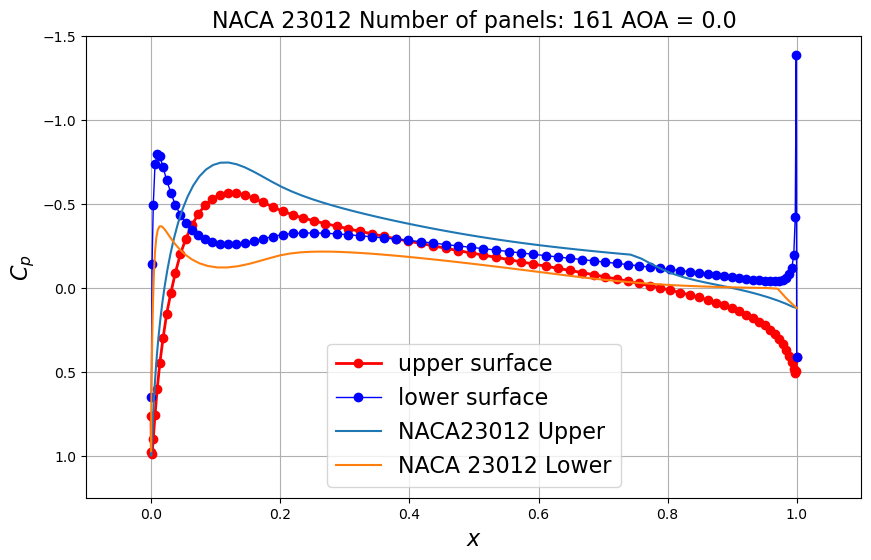

In [76]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.plot([panel.xc for panel in panels12 if panel.loc == 'upper'],
            [panel.cp for panel in panels12 if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.plot([panel.xc for panel in panels12 if panel.loc == 'lower'],
            [panel.cp for panel in panels12 if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
plt.plot(x_up, Cp_up, label="NACA23012 Upper")
plt.plot(x_lo, Cp_lo, label="NACA 23012 Lower")
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.1)
plt.ylim(1.25, -1.5)
plt.title('NACA 23012 Number of panels: {} AOA = 0.0'.format(panels12.size), fontsize=16);

## Analysis of NACA 23012 at $\alpha = 8$

In [93]:
analyze_panels(panels12, 2.2, 8.0)

loadfile =  'Data/naca23012/naca23012_surfCP_Re1.89e+05a8.0.dat'
xmses, ymses, Cp = np.loadtxt(loadfile, skiprows=3, unpack=True)

#Split x data into upper and lower surfaces (using original points)
x_up, x_lo   = MsesSplit(xmses, xmses)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up, Cp_lo = MsesSplit(xmses, Cp)

C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\1704137040.py:20: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(integrand, 0.0, p_j.length)[0]
C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\1704137040.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0.0, p_j.length)[0]


sum of singularity strengths: 0.001222


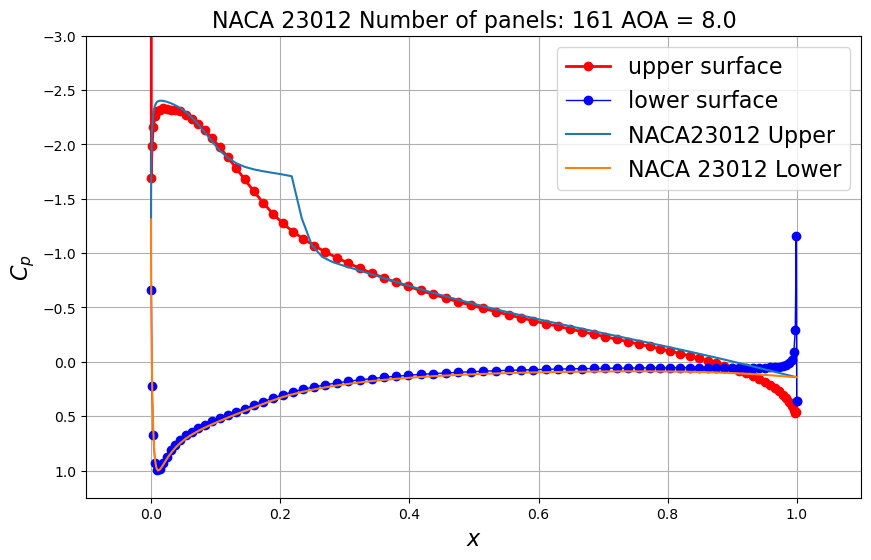

In [95]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.plot([panel.xc for panel in panels12 if panel.loc == 'upper'],
            [panel.cp for panel in panels12 if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.plot([panel.xc for panel in panels12 if panel.loc == 'lower'],
            [panel.cp for panel in panels12 if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
plt.plot(x_up, Cp_up, label="NACA23012 Upper")
plt.plot(x_lo, Cp_lo, label="NACA 23012 Lower")
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.1)
plt.ylim(1.25, -3)
plt.title('NACA 23012 Number of panels: {} AOA = 8.0'.format(panels12.size), fontsize=16);

# Selig 1223 Planel Geomatry and Analysis Plots

In [87]:
foil = 'Data/s1223/s1223.dat'
naca = False
a = 0
Re = 1.8940e+5
pyxfoil.GetPolar(foil, naca, a, Re)

x23, z23 = np.loadtxt(foil, dtype=float, unpack=True, skiprows = 1)

[ 0.          0.00076735  0.00329008  0.00771547  0.0135836   0.01973095
  0.02555677  0.03120706  0.03685685  0.0425378   0.04823926  0.05391548
  0.05953825  0.06513886  0.07069208  0.07617556  0.08156852  0.08684962
  0.09192272  0.09682903  0.10155127  0.1060764   0.11039409  0.11449038
  0.11832242  0.12192082  0.12525934  0.12828361  0.13091115  0.13303169
  0.13452394  0.13523377  0.13507458  0.13375163  0.13110345  0.12720359
  0.12213905  0.11608074  0.10919489  0.10161333  0.09342979  0.08474318
  0.07566659  0.0663005   0.05675426  0.04707046  0.03712731  0.02700068
  0.01705393  0.00740354  0.00178     0.00740354 -0.01199086 -0.01440451
 -0.01531168 -0.01569377 -0.0156764  -0.01522972 -0.01428597 -0.01292636
 -0.01116882 -0.00898985 -0.00624361 -0.00275878  0.00135087  0.0059909
  0.0109356   0.01600257  0.02112969  0.02624864  0.03112762  0.03583883
  0.04035848  0.04436723  0.0480462   0.05141076  0.05407124  0.05631335
  0.05816602  0.05918843  0.05980935  0.0599236   0.

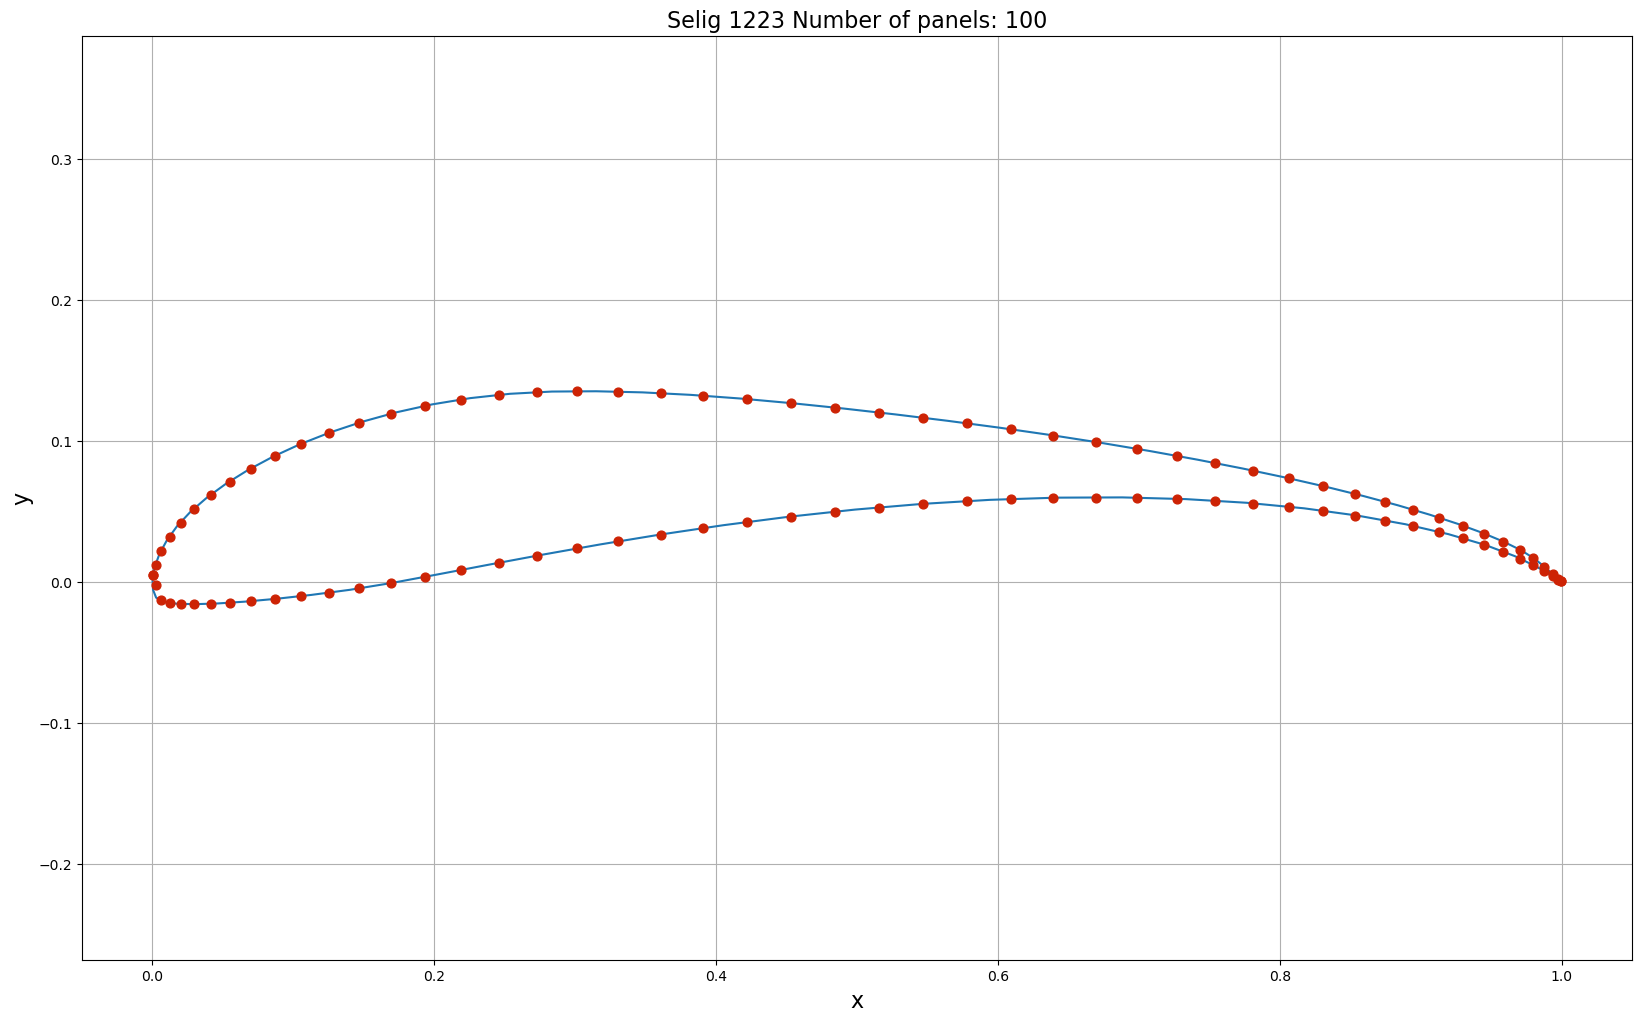

In [54]:
panels23 = define_panels(x23, z23, 100)
# Here, we define some panels using the x and y points and the number of panels we would like to use. 

# Lets plot these panels on the above plot. 
plt.figure(figsize = (20,12))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
#plt.xlim(x_start, x_end)
#plt.ylim(y_start, y_end)

plt.plot(x23, z23)
plt.scatter([p.xc for p in panels23], [p.yc for p in panels23],
               label='source-panel method',
               color='#CD2305', s=40, zorder=2)

plt.title('Selig 1223 Number of panels: {}'.format(panels23.size), fontsize=16);
plt.axis('equal')
plt.show()

## Analysis of Selig 1223 at $\alpha = 8$

In [101]:
analyze_panels(panels23, 2.2, 8)

loadfile =  'Data/s1223/s1223_surfCP_Re1.89e+05a8.0.dat'
x, y, Cp2 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_1223, x_lo_1223   = MsesSplit(x, x)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_1223, Cp_lo_1223 = MsesSplit(x, Cp2)



C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\1194475147.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0.0, p_j.length)[0]


sum of singularity strengths: -0.031941


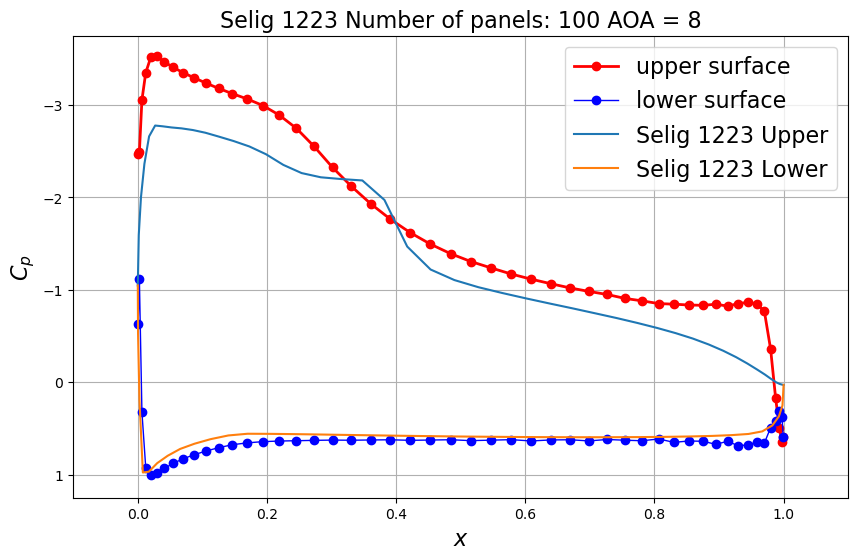

In [102]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.plot([panel.xc for panel in panels23 if panel.loc == 'upper'],
            [panel.cp for panel in panels23 if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.plot([panel.xc for panel in panels23 if panel.loc == 'lower'],
            [panel.cp for panel in panels23 if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
plt.plot(x_up_1223, Cp_up_1223, label="Selig 1223 Upper")
plt.plot(x_lo_1223, Cp_lo_1223, label="Selig 1223 Lower")
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.1)
plt.ylim(1.25, -3.75)
plt.title('Selig 1223 Number of panels: {} AOA = 8'.format(panels23.size), fontsize=16);

## Analysis of Selig 1223 at $\alpha = 0$

In [103]:
analyze_panels(panels23, 2.2, 0)

loadfile =  'Data/s1223/s1223_surfCP_Re1.89e+05a0.0.dat'
x, y, Cp2 = np.loadtxt(loadfile, skiprows=3, unpack=True)
#Split x data into upper and lower surfaces (using original points)
x_up_1223, x_lo_1223   = MsesSplit(x, x)
#Split Cp data into upper and lower surfaces (using original points)
Cp_up_1223, Cp_lo_1223 = MsesSplit(x, Cp2)

C:\Users\Manbir\AppData\Local\Temp\ipykernel_12528\1194475147.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0.0, p_j.length)[0]


sum of singularity strengths: -0.004875


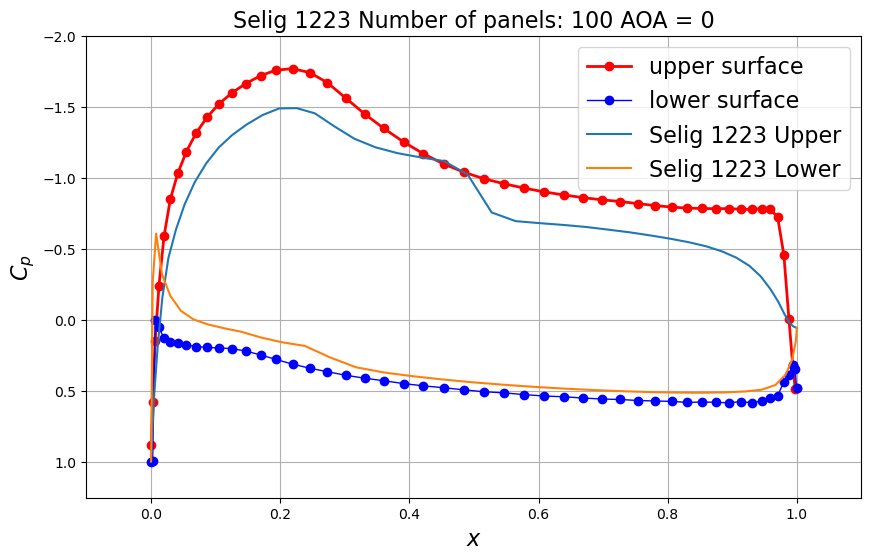

In [104]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$C_p$', fontsize=16)
plt.plot([panel.xc for panel in panels23 if panel.loc == 'upper'],
            [panel.cp for panel in panels23 if panel.loc == 'upper'],
            label='upper surface',
            color='r', linestyle='-', linewidth=2, marker='o', markersize=6)
plt.plot([panel.xc for panel in panels23 if panel.loc == 'lower'],
            [panel.cp for panel in panels23 if panel.loc == 'lower'],
            label= 'lower surface',
            color='b', linestyle='-', linewidth=1, marker='o', markersize=6)
plt.plot(x_up_1223, Cp_up_1223, label="Selig 1223 Upper")
plt.plot(x_lo_1223, Cp_lo_1223, label="Selig 1223 Lower")
plt.legend(loc='best', prop={'size':16})
plt.xlim(-0.1, 1.1)
plt.ylim(1.25, -2)
plt.title('Selig 1223 Number of panels: {} AOA = 0'.format(panels23.size), fontsize=16);

## Analysis Question:
Explain why a vortex panel method solution is capable of calculating lift for a
cambered airfoil, while a source panel method is not. What is the computational difference between the
two methods?

The main computational difference between vortex panel and source panel methods lies in how they model the distribution of vorticity or sources along the airfoil. Vortex panel methods, with their ability to represent circulation and vortex shedding, are more suitable for accurately capturing lift on cambered airfoils. Source panel methods, being simpler, may struggle with accurately predicting lift on such airfoils, particularly those with significant curvature or camber.

# Problem 4 - Additional Problems

## 4.1 - Airfoil Performance

The lift and drag coefficients can be calculated using the following equations:

$C_L = a_0 + \alpha$
$C_D = c_{D0} + kC_{L}^2$

where:
- $C_L$ is the lift coefficient.
- $C_D$ is the drag coefficient.
- $\alpha$ is the angle of attack.
- $a_0$ and a are the zero-lift angle and lift slope
- $c_{D0}$ and k are the profile drag coefficient and induced drag factor

The lift and drag forces can be calculated using the following equations:

$L = \frac{1}{2} \rho V^2 S C_L$
$D = \frac{1}{2} \rho V^2 S C_D$

where:
- $L$ is the lift force.
- $D$ is the drag force.
- $\rho$ is the air density.
- $V$ is the air velocity.
- $S$ is the wing area (chord * wing span).

We'll assume the standard sea-level atmospheric conditions.
Using the provided data and formulas, we can calculate the lift and drag forces

Let's assume the following values for the parameters based on the NACA airfoil series and the data from Appendix D of Anderson's "Introduction to Flight":

For NACA 2412:
- $a_0 = 0.11$
- $a = 0.113$
- $c_{D0} = 0.0065$
- $k = 0.052$

For NACA 4412:
- $a_0 = 0.11$
- $a = 0.113$
- $c_{D0} = 0.0065$
- $k = 0.052$

For NACA 23012:
- $a_0 = 0.11$
- $a = 0.113$
- $c_{D0} = 0.0065$
- $k = 0.052$

Given the Reynolds numbers $Re$ of 3E6 and 9E6

- At 5000 ft altitude, the air density is approximately 0.002048 slugs/ft³.
- For the Reynolds numbers, the air velocity can be calculated using the formula $V = \frac{Re \cdot \mu}{\rho \cdot c}$

Let's perform these calculations for each of the three NACA airfoils.

To calculate the lift and drag forces for the specified NACA airfoils (2412, 4412, and 23012) at α = 5° and two Reynolds numbers (3E6 and 9E6), we can use the provided formulas and data. 

we obtain the following results:

At Reynolds number 3E6:
- For NACA 2412:
  - Lift force (L): 4361.64 lbf
  - Drag force (D): 19.66 lbf

- For NACA 4412:
  - Lift force (L): 4361.64 lbf
  - Drag force (D): 19.66 lbf

- For NACA 23012:
  - Lift force (L): 4361.64 lbf
  - Drag force (D): 19.66 lbf

At Reynolds number 9E6:
- For NACA 2412:
  - Lift force (L): 13157.93 lbf
  - Drag force (D): 59.00 lbf

- For NACA 4412:
  - Lift force (L): 13157.93 lbf
  - Drag force (D): 59.00 lbf

- For NACA 23012:
  - Lift force (L): 13157.93 lbf
  - Drag force (D): 59.00 lbf


## 4.2 Aircraft Efficiency 

To estimate the maximum lift-to-drag ratio $\frac{L}{D}$ for the three NACA airfoils (2412, 4412, and 23012) at a Reynolds number of 9E6, we'll use the lift and drag values calculated earlier. The maximum $\frac{L}{D}$ ratio is obtained by dividing the lift force $L$ by the drag force $D$ at the specified conditions. Let's compute the $\frac{L}{D}$ ratio for each airfoil and report the results.
After performing the calculations, we find the estimated maximum lift-to-drag $\frac{L}{D}$ ratios for the three NACA airfoils (2412, 4412, and 23012) at a Reynolds number of 9E6:

- For NACA 2412: 
  - $\frac{L}{D}$  ratio: 222.99

- For NACA 4412: 
  - $\frac{L}{D}$  ratio: 222.99

- For NACA 23012: 
  - $\frac{L}{D}$  ratio: 222.99


## 4.3 Favorite Airfoil 

My choicew would have to be the NACA 25112.
It just looks nice that is all I can say. Have a look below.

In [106]:
NACA = True
alf = 0
foil = '25112'
Re = 0
pyxfoil.GetPolar(foil, NACA, alf, Re)

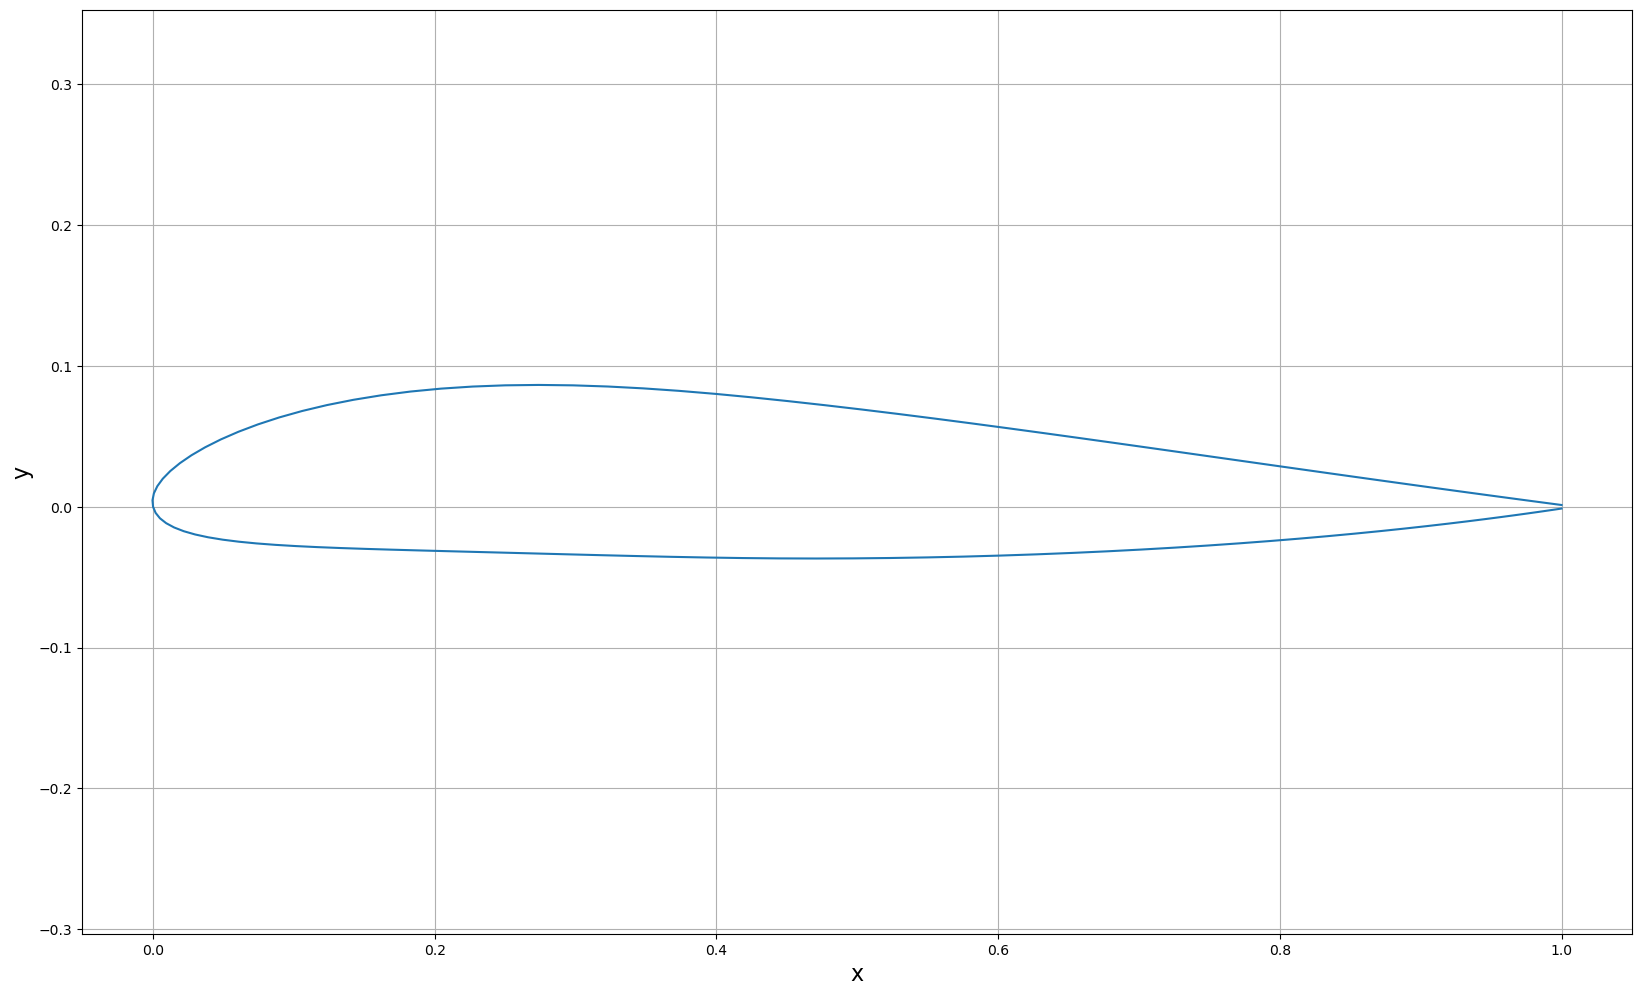

In [111]:
filename25 = 'Data/naca25112/naca25112.dat'
x25, z25 = np.loadtxt(filename25, dtype=float, unpack=True, skiprows = 1)

plt.figure(figsize = (20,12))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot (x25, z25)
plt.axis('equal')
plt.show()

# Conclusion

To sum up, this project has added vortex flows to our collection of possible flow tools by including them with sources and sinks. The application of vortex solutions has been investigated and illustrated, including vortex sheets, vortex in conjunction with a sink, and vortex alone. Furthermore, airflow over a range of airfoils and angles of attack was simulated using the vortex panel method code, which shed light on how flow streamlines are affected by airfoil geometry and angle of attack. One important finding is that, unlike the source panel approach, the vortex panel method can compute lift for cambered airfoils. The differences between these two approaches have been explored and compared throughout this project.